In [1]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [66]:
# set configurations
sample_size = 100
nr_sample_sets = 20
num_steps = 5
x_b = np.linspace(0,1,num_steps)

n_folds = 5
test_size = 0.2

## Figures for the report

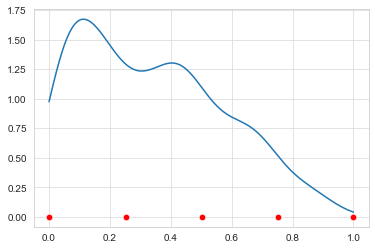

In [37]:
a = kde_df.iloc[1]
y = list(a[:-1])
x = list(np.linspace(0,1,200))
#fig, ax = plt.subplots()
sns.set_style("whitegrid",{'grid.color':'#DDDDDD'})
ax=sns.lineplot(x=x, y=y)
highlight_index = 50  # Index of the point to highlight
highlight_x = x[highlight_index]
highlight_y = y[highlight_index]

sns.scatterplot(x=[x[0]], y=0, color='red', s=40, zorder=10)
#sns.scatterplot(x=[x[0]], y=[y[0]], color='black', s=40, zorder=10)

sns.scatterplot(x=[x[50]], y=0, color='red', s=40, zorder=10)
#sns.scatterplot(x=[x[50]], y=[y[50]], color='black', s=40, zorder=10)

sns.scatterplot(x=[x[100]], y=0, color='red', s=40, zorder=10)
#sns.scatterplot(x=[x[100]], y=[y[100]], color='black', s=40, zorder=10)

sns.scatterplot(x=[x[150]], y=0, color='red', s=40, zorder=10)
#sns.scatterplot(x=[x[150]], y=[y[150]], color='black', s=40, zorder=10)

sns.scatterplot(x=[x[199]], y=0, color='red', s=40, zorder=10)
#sns.scatterplot(x=[x[199]], y=[y[199]], color='black', s=40, zorder=10)

#plt.plot([highlight_x, highlight_x], [highlight_y, 0], color='grey', linestyle='--', linewidth=1)
#plt.text(0, highlight_y, f'this point', ha='left', va='center_baseline', zorder=10)
#plt.text(highlight_x, 0, f'w_i', ha='left', va='baseline', zorder=10)
#sns.scatterplot(x=0, y=[highlight_y], color='red', s=50, zorder=10)
#plt.plot([highlight_x, 0], [highlight_y, highlight_y], color='grey', linestyle='--', linewidth=1)
#plt.legend(['Kernel density estimation of f'])
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 2)
plt.show()

In [17]:
highlight_x

0.25125628140703515

### Same number of elements

In [67]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [68]:
x_b = np.linspace(0,1,num_steps)
kde_df = dem.get_kde(bounded_samples, x_b)
kde_df.head(3)

,0,1,2,3,4,label
0,1.080242,1.354054,1.012926,0.409349,0.094254,beta_1_2
1,1.017162,1.402764,1.051907,0.541660,0.018426,beta_1_2
2,0.796520,1.983101,0.777890,0.333533,0.066190,beta_1_2


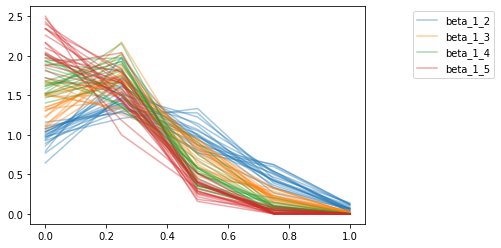

In [69]:
dem.get_kde_plot(kde_df,x_b)

In [32]:
bounded_samples_st = dm.get_st_samples(bounded_dists, nr_sample_sets, sample_size)
min_ = np.percentile(bounded_samples_st.iloc[:,:-1],2.5)
max_ = np.percentile(bounded_samples_st.iloc[:,:-1],97.5)
x_b_st = np.linspace(min_, max_, num_steps)
kde_df = dem.get_kde(bounded_samples_st, x_b_st)
kde_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.309849,0.320095,0.329994,0.339510,0.348613,0.357271,0.365462,0.373162,0.380355,0.387027,...,0.075682,0.074024,0.072321,0.070577,0.068794,0.066973,0.065117,0.063231,0.061317,beta_1_2
1,0.331638,0.339376,0.346624,0.353366,0.359589,0.365285,0.370450,0.375084,0.379187,0.382768,...,0.061388,0.059566,0.057757,0.055955,0.054159,0.052368,0.050580,0.048794,0.047011,beta_1_2
2,0.314500,0.324382,0.333826,0.342800,0.351277,0.359235,0.366657,0.373531,0.379852,0.385617,...,0.070187,0.068531,0.066879,0.065232,0.063589,0.061952,0.060320,0.058694,0.057074,beta_1_2


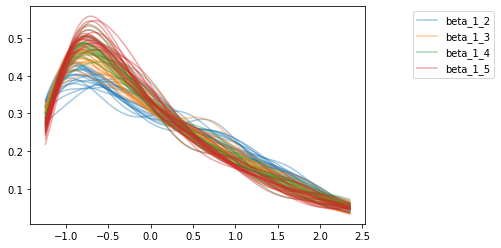

In [33]:
dem.get_kde_plot(kde_df,x_b_st)

## Bounded distributions

In [92]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(2,20))

### SVM

In [90]:
cost = [0.01, 0.1, 0.5, 1, 5, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [93]:
res_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'kde', cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

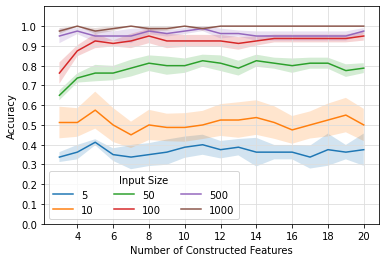

In [95]:
cm.plot_cv_numsteps_samplesize_v2(res_svm)

### Logistic Regression

In [96]:
C = [0.01, 0.25, 1, 5, 10]

In [97]:
res_lr = cm.cv_numsteps_samplesize_lr(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'kde', C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

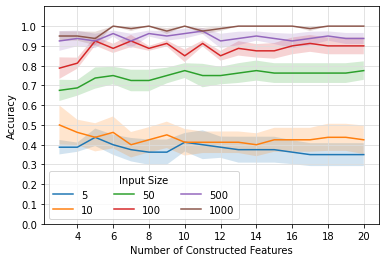

In [98]:
cm.plot_cv_numsteps_samplesize_v2(res_lr)

## Varying number of elements

### svm

In [99]:
res_flex_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'kde', cost, gamma, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

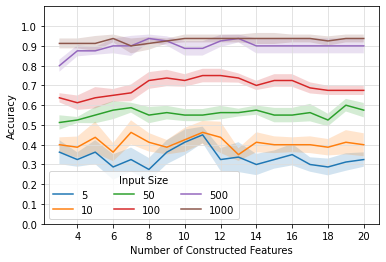

In [109]:
cm.plot_cv_numsteps_samplesize_v2(res_flex_svm)

In [102]:
res_flex_lr = cm.cv_numsteps_samplesize_lr(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'kde', C, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

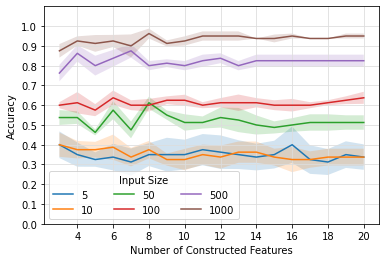

In [103]:
cm.plot_cv_numsteps_samplesize_v2(res_flex_lr)

### Heavytail distributions

In [104]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform=False)
heavytail_samples_st = dm.get_st_samples(heavytail_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [105]:
perc_95 = np.percentile(heavytail_samples.iloc[:,:-1],97.5)
x_h = np.linspace(0,perc_95,num_steps)
kde_df = dem.get_kde(heavytail_samples, x_h)
kde_df.head(3)

,0,1,2,3,4,label
0,0.119147,0.056306,0.006450,2.051888e-03,1.203617e-04,cauchy
1,0.200838,0.029519,0.002834,9.340365e-09,3.073046e-14,cauchy
2,0.106319,0.061957,0.010930,3.757590e-03,2.686400e-03,cauchy


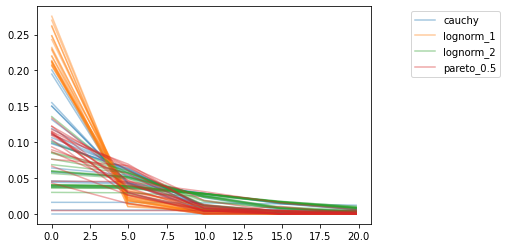

In [106]:
dem.get_kde_plot(kde_df,x_h)

### SVM

In [108]:
res_ht_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 'kde', cost, gamma, transform=False)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

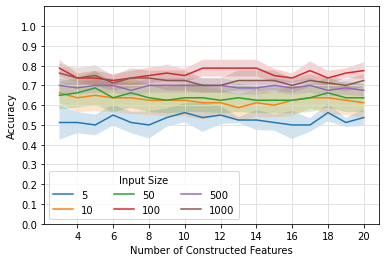

In [110]:
cm.plot_cv_numsteps_samplesize_v2(res_ht_svm)

In [111]:
res_ht_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 'kde', cost, gamma, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

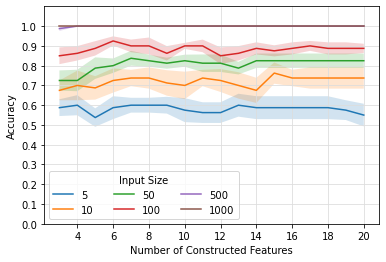

In [112]:
cm.plot_cv_numsteps_samplesize_v2(res_ht_svm)

### Logististic Regression

In [113]:
res_ht_lr = cm.cv_numsteps_samplesize_lr(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 'kde', C, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

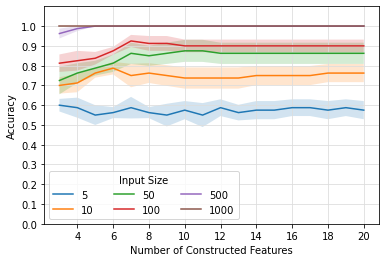

In [114]:
cm.plot_cv_numsteps_samplesize_v2(res_ht_lr)

In [122]:
res_ht_lr = cm.cv_numsteps_samplesize_lr(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 'kde', C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

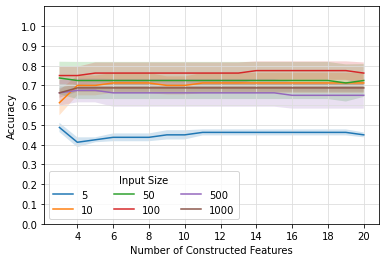

In [123]:
cm.plot_cv_numsteps_samplesize_v2(res_ht_lr)

## Multi Modal

In [115]:
nr_modes = 5
nr_sample_sets = 20
nr_mm_dist = 10
sample_size=50

In [116]:
mm_df= dm.get_multimodal_dists(nr_mm_dist, nr_sample_sets, nr_modes, sample_size)
moments_df = dem.get_moments(mm_df, 10)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,6.150623,5.737779,-3.728949,74.185456,-110.480015,1233.572444,-3026.836547,24056.297672,-80521.781767,522047.096652,Dist 01
1,6.048802,6.663275,-5.753834,96.945276,-180.245497,1797.183433,-5115.883989,38762.827964,-142718.027076,924265.701615,Dist 01
2,6.120121,5.368667,-2.126664,78.114010,-34.118194,1578.465100,-344.191654,37884.232743,5370.751670,992539.558984,Dist 01


### svm

In [117]:
res_mm_svm = cm.cv_numsteps_samplesize_svm_mm(sample_size_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, 'kde',cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

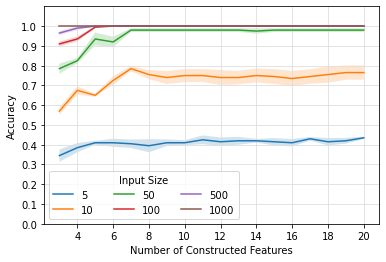

In [118]:
cm.plot_cv_numsteps_samplesize_v2(res_mm_svm)

### logistic regression

In [119]:
res_mm_lr = cm.cv_numsteps_samplesize_lr_mm(sample_size_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, 'kde', C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

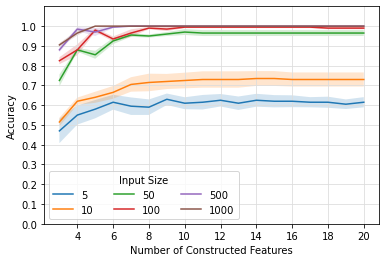

In [120]:
cm.plot_cv_numsteps_samplesize_v2(res_mm_lr)

In [121]:
res_svm.to_csv('results/kde/res_svm_bounded.csv')
res_flex_svm.to_csv('results/kde/res_svm_bounded_fles.csv')
res_ht_svm.to_csv('results/kde/res_svm_heavytail.csv')
res_mm_svm.to_csv('results/kde/res_svm_mm.csv')

res_lr.to_csv('results/kde/res_lr_bounded.csv')
res_flex_lr.to_csv('results/kde/res_lr_bounded_flex.csv')
res_ht_lr.to_csv('results/kde/res_lr_heavytail.csv')
res_mm_lr.to_csv('results/kde/res_lr_multi_modal.csv')